In [71]:

import numpy as np

import os

import numpy as np

import matplotlib.pyplot as plt

import plotly.graph_objects as go

import gzip
import pickle as pkl

def loadall_results(path, horizon, n_folds):
    unpickled_objects = []
    with gzip.open(  path ,'rb') as file:
        while True:
            try:
                # Unpickle the next object in the file
                obj = pkl.load(file)
                unpickled_objects.append(obj)
            except EOFError:
                # End of file reached
                break
    result = np.array(unpickled_objects) #.reshape( (n_folds, horizon) )
    result = np.delete(result, 0, axis=0)
    return result

game = 'AT'
horizon = 100
n_folds = 4
direct = './results/{}/'.format(game)
task = 'imbalanced'
context_type = 'linear'

# approach =  'neuralcbpside_1' #'neuralcbp_1' #'neuralcbp_simplified'  
approach = 'cbpside_theory'

path = os.path.join(direct, 'benchmark_{}_{}_{}_{}_{}.pkl.gz'.format(task, context_type,horizon,n_folds,approach) )
res1 = loadall_results(path, horizon, n_folds)
res1


array([[0.7029601721581151, 1.5063769910855749, 1.5063769910855749,
        2.1639044774262413, 2.1639044774262413, 2.1639044774262413,
        2.1639044774262413, 2.704374914284248, 3.46111726590736,
        3.8682837483520056, 4.462393645074419, 4.865112210944684,
        4.865112210944684, 5.454017761273505, 5.454017761273505,
        5.454017761273505, 5.454017761273505, 5.454017761273505,
        5.454017761273505, 6.036320436135242, 6.53474414845273,
        6.53474414845273, 6.53474414845273, 7.121766077503075,
        7.121766077503075, 7.4757073910236755, 7.4757073910236755,
        7.4757073910236755, 7.953006969638432, 7.953006969638432,
        7.953006969638432, 8.638365430125969, 8.638365430125969,
        8.638365430125969, 8.638365430125969, 8.638365430125969,
        9.448735350282691, 9.448735350282691, 10.056990926827785,
        10.556917663670177, 10.556917663670177, 10.556917663670177,
        10.556917663670177, 10.967580730139346, 10.967580730139346,
        11.

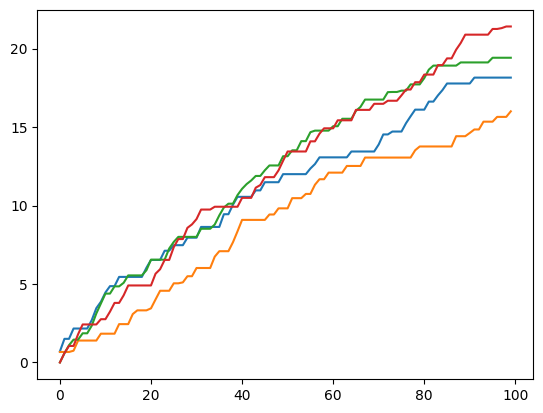

In [72]:
for i in res1:
    plt.plot( range(horizon), i )